### 0. Importing modules and data

In [180]:
import pandas as pd
from edastatmil_milser import edas_tatmil as EDA
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [181]:
raw_df = pd.read_csv('../data/raw/DemoHealth.csv')
raw_df.head()

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,...,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,...,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,...,2373,19.7,18.6,20.6,3870,4.5,4.2,4.8,887,6
3,1007,22400,2456,10.964286,2596,11.589286,3029,13.522321,3113,13.897321,...,1789,14.1,13.2,14.9,2511,3.3,3.1,3.6,595,2
4,1009,57840,7095,12.266598,7570,13.087828,6742,11.656293,6884,11.901798,...,4661,13.5,12.6,14.5,6017,3.4,3.2,3.7,1507,2


### 1. Objective
We want to discover if there is any relationship between healthcare resources and sociodemographic data. We choose 'anycondition_number' as target.

### 2.Exploration and superficial cleaning

In [182]:
categorical, numerical = EDA.explore(raw_df)

Rows: 3140
Columns: 108
+-------------------------------------------------------------------------------+----------------+------------+-----------+---------------+
|                                                                               | Non-Null Count | Null Count | Data Type | Data Category |
+-------------------------------------------------------------------------------+----------------+------------+-----------+---------------+
|                                     fips                                      |      3140      |     0      |   int64   |   Numerical   |
|                                    TOT_POP                                    |      3140      |     0      |   int64   |   Numerical   |
|                                      0-9                                      |      3140      |     0      |   int64   |   Numerical   |
|                            0-9 y/o % of total pop                             |      3140      |     0      |  float64  |   Numerical 

There are no null values, and all variables except County_nameand state_name, are numerical.

#### 2.1 Drop unuseful information
We drop the following columns:

FIPS stands for "Federal Information Processing Standards, Less than a high school diploma 2014-18, High school diploma only 2014-18, Some college or associate's degree 2014-18, Bachelor's degree or higher 2014-18, Percent of adults with less than a high school diploma 2014-18, 
FIPS" stands for "Federal Information Processing Standards, Less than a high school diploma 2014-18, High school diploma only 2014-18, Some college or associate's degree 2014-18, Bachelor's degree or higher 2014-18, Percent of adults with less than a high school diploma 2014-18, Percent of adults with a high school diploma only 2014-18, Percent of adults completing some college or associate's degree 2014-18, Percent of adults with a bachelor's degree or higher 2014-18, Civilian_labor_force_2018, Employed_2018, Unemployed_2018.

In [183]:
df = raw_df.copy()

df.drop(["fips", "Less than a high school diploma 2014-18", "High school diploma only 2014-18","Some college or associate's degree 2014-18", "Bachelor's degree or higher 2014-18", "Percent of adults with less than a high school diploma 2014-18", 
"Percent of adults with a high school diploma only 2014-18", "Percent of adults completing some college or associate's degree 2014-18", "Percent of adults with a bachelor's degree or higher 2014-18", "Civilian_labor_force_2018", "Employed_2018", "Unemployed_2018",'POP_ESTIMATE_2018',
       'N_POP_CHG_2018', 'GQ_ESTIMATES_2018', 'R_birth_2018', 'R_death_2018','R_NATURAL_INC_2018', 'R_INTERNATIONAL_MIG_2018', 'R_DOMESTIC_MIG_2018','R_NET_MIG_2018', 'POVALL_2018', 'PCTPOVALL_2018', 'PCTPOV017_2018','PCTPOV517_2018', 'MEDHHINC_2018', 'CI90LBINC_2018', 'CI90UBINC_2018',
       'Unemployment_rate_2018', 'Median_Household_Income_2018','Med_HH_Income_Percent_of_State_Total_2018','Percent of Population Aged 60+','0-9 y/o % of total pop','10-19 y/o % of total pop','20-29 y/o % of total pop','30-39 y/o % of total pop','40-49 y/o % of total pop','50-59 y/o % of total pop','60-69 y/o % of total pop','70-79 y/o % of total pop','80+ y/o % of total pop','% White-alone','% Black-alone','% NA/AI-alone','% Asian-alone','% Hawaiian/PI-alone','% Two or more races','STATE_FIPS', 'CNTY_FIPS', 'county_pop2018_18 and older'], axis = 1, inplace = True)

In [184]:
df.rename(columns={'19-Oct': '10-19'}, inplace=True)


In [185]:
categorical, numerical = EDA.explore(df)

Rows: 3140
Columns: 58
+-------------------------------------------------------------------------------+----------------+------------+-----------+---------------+
|                                                                               | Non-Null Count | Null Count | Data Type | Data Category |
+-------------------------------------------------------------------------------+----------------+------------+-----------+---------------+
|                                    TOT_POP                                    |      3140      |     0      |   int64   |   Numerical   |
|                                      0-9                                      |      3140      |     0      |   int64   |   Numerical   |
|                                     10-19                                     |      3140      |     0      |   int64   |   Numerical   |
|                                     20-29                                     |      3140      |     0      |   int64   |   Numerical  

### 3. Univariate analysis

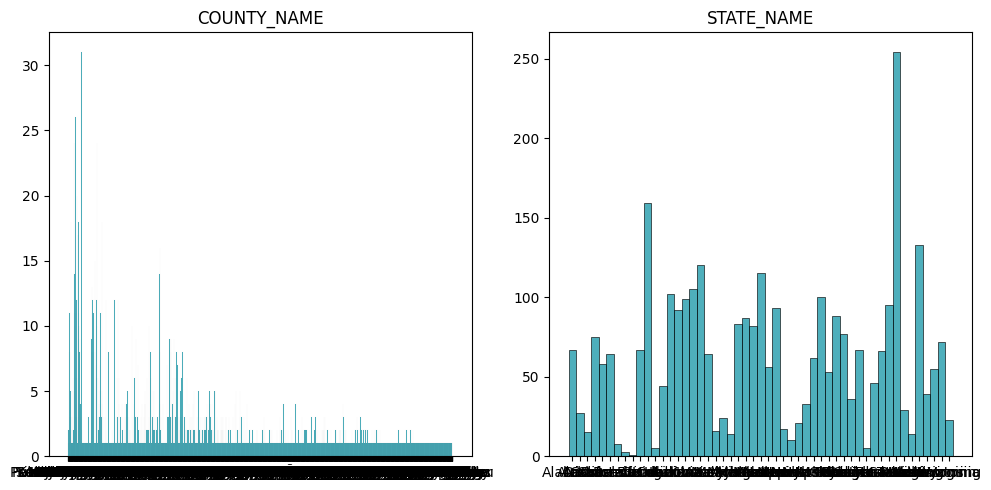

In [186]:
EDA.univariate_hist(categorical, df)

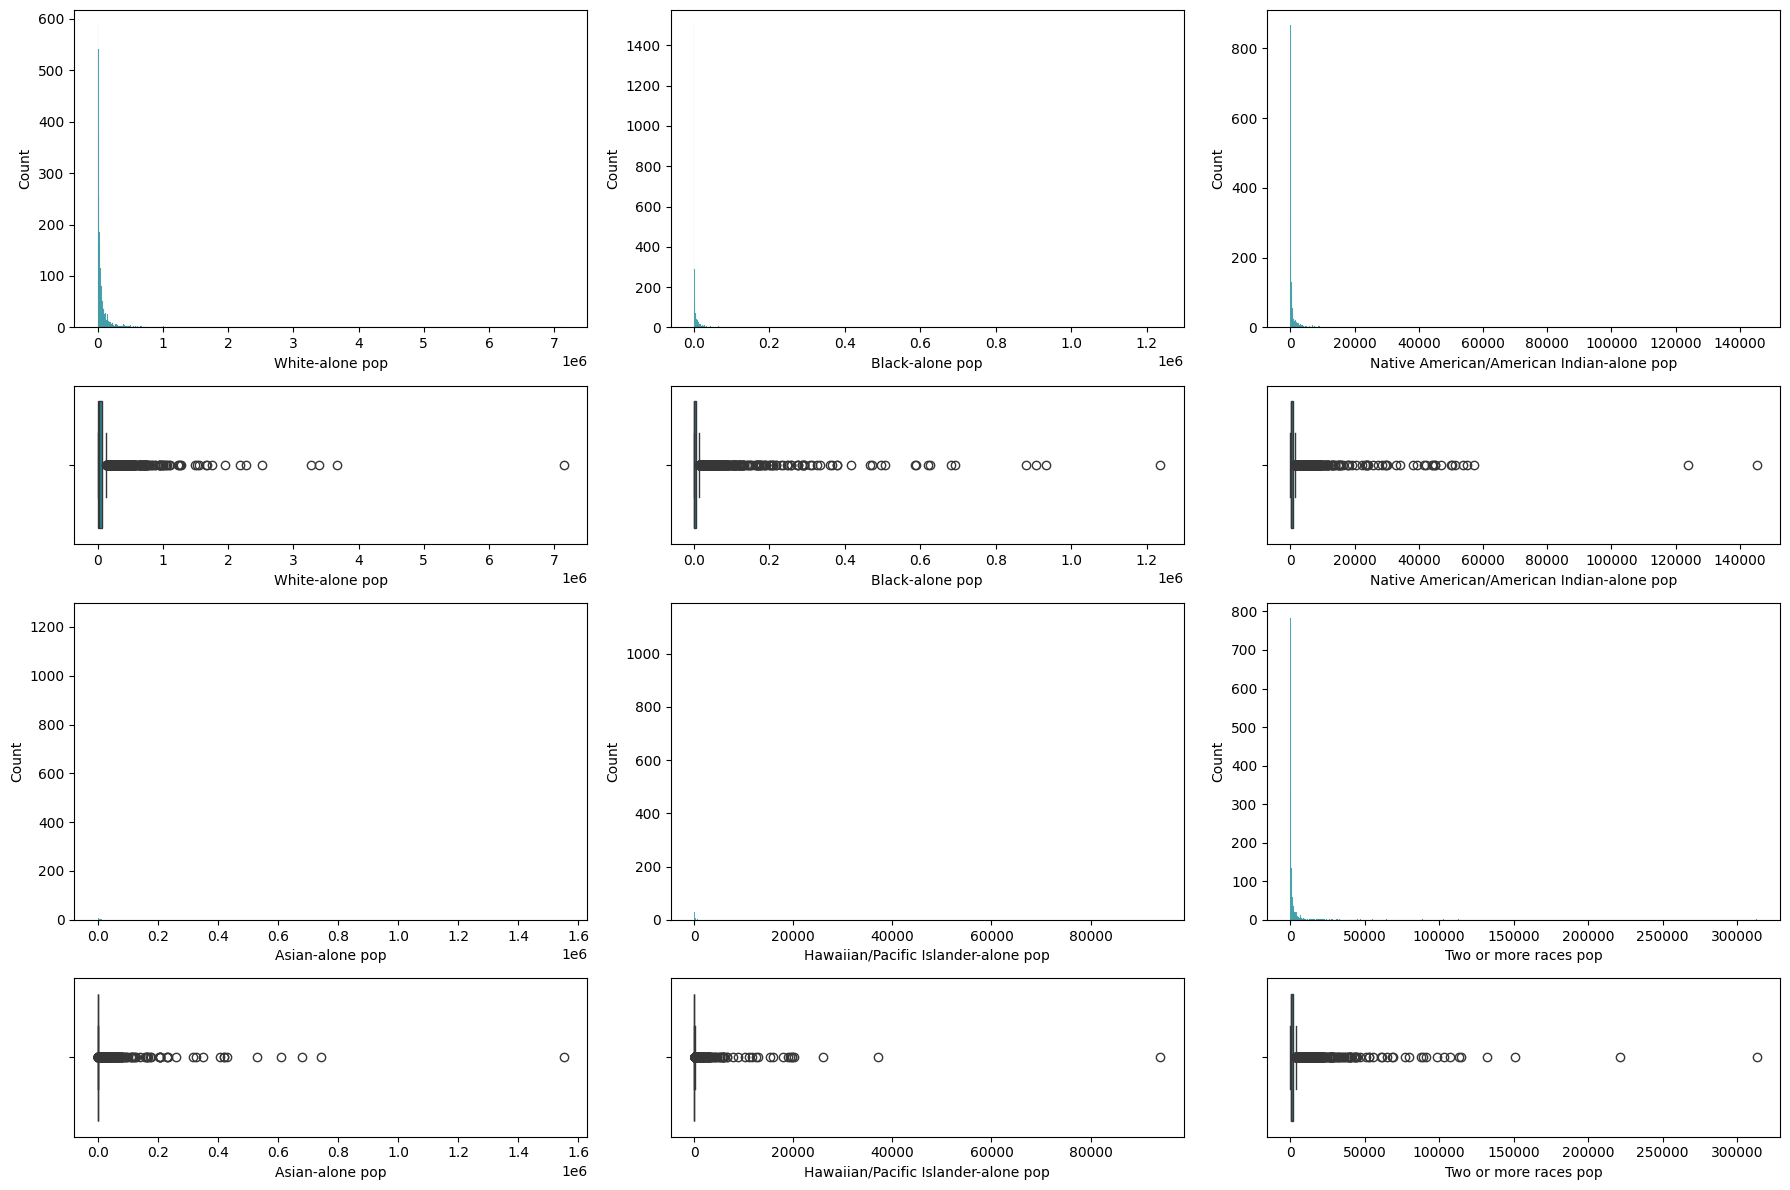

In [155]:
EDA.univariate_histbox(['White-alone pop', 'Black-alone pop',
       'Native American/American Indian-alone pop', 'Asian-alone pop',
       'Hawaiian/Pacific Islander-alone pop', 'Two or more races pop'], df)

There is not an uniforme number of data for all states. Races data are not relevant, so we can drop it too.



In [187]:
df.drop(['White-alone pop', 'Black-alone pop',
       'Native American/American Indian-alone pop', 'Asian-alone pop',
       'Hawaiian/Pacific Islander-alone pop', 'Two or more races pop'], axis = 1, inplace = True)

### 4. Multivariate analysis

In [188]:
df.columns

Index(['TOT_POP', '0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69',
       '70-79', '80+', 'Active Physicians per 100000 Population 2018 (AAMC)',
       'Total Active Patient Care Physicians per 100000 Population 2018 (AAMC)',
       'Active Primary Care Physicians per 100000 Population 2018 (AAMC)',
       'Active Patient Care Primary Care Physicians per 100000 Population 2018 (AAMC)',
       'Active General Surgeons per 100000 Population 2018 (AAMC)',
       'Active Patient Care General Surgeons per 100000 Population 2018 (AAMC)',
       'Total nurse practitioners (2019)', 'Total physician assistants (2019)',
       'Total Hospitals (2019)', 'Internal Medicine Primary Care (2019)',
       'Family Medicine/General Practice Primary Care (2019)',
       'Total Specialist Physicians (2019)', 'ICU Beds_x', 'Total Population',
       'Population Aged 60+', 'COUNTY_NAME', 'STATE_NAME',
       'anycondition_prevalence', 'anycondition_Lower 95% CI',
       'anycondition_Upper 95% C

In [189]:
df.rename(columns={'Active Physicians per 100000 Population 2018 (AAMC)': 'Physicians'}, inplace=True)
df.rename(columns={'Total Active Patient Care Physicians per 100000 Population 2018 (AAMC)': 'Patient Care'}, inplace=True)
df.rename(columns={'Active Physicians per 100000 Population 2018 (AAMC)': 'Physicians'}, inplace=True)
df.rename(columns={'Active Physicians per 100000 Population 2018 (AAMC)': 'Physicians'}, inplace=True)
df.rename(columns={'Total Active Patient Care Physicians per 100000 Population 2018 (AAMC)': 'Patient Care'}, inplace=True)
df.rename(columns={'Total Active Patient Care Physicians per 100000 Population 2018 (AAMC)': 'Patient Care'}, inplace=True)
df.rename(columns={'Active Primary Care Physicians per 100000 Population 2018 (AAMC)': 'Primary Care'}, inplace=True)
df.rename(columns={'Active Patient Care Primary Care Physicians per 100000 Population 2018 (AAMC)': 'Patient Care Primary Care'}, inplace=True)
df.rename(columns={'Active General Surgeons per 100000 Population 2018 (AAMC)': 'General Surgeons'}, inplace=True)
df.rename(columns={'Active Patient Care General Surgeons per 100000 Population 2018 (AAMC)': 'Patient Care General Surgeons'}, inplace=True)
df.rename(columns={'Total nurse practitioners (2019)': 'nurse practitioners'}, inplace=True)
df.rename(columns={'Total physician assistants (2019)': 'physician assistants'}, inplace=True)
df.rename(columns={'Internal Medicine Primary Care (2019)': 'Internal Medicine'}, inplace=True)
df.rename(columns={'Family Medicine/General Practice Primary Care (2019)': 'Medicine/General'}, inplace=True)
df.rename(columns={'Total Specialist Physicians (2019)': 'Specialist'}, inplace=True)


In [190]:
print(categorical)

['COUNTY_NAME', 'STATE_NAME']


In [191]:
df_f = EDA.factorize_categorical(df,categorical)
df_f.to_csv('../data/processed/NonSplit/AllPrecleaned.csv')
df_f.columns

Index(['TOT_POP', '0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69',
       '70-79', '80+', 'Physicians', 'Patient Care', 'Primary Care',
       'Patient Care Primary Care', 'General Surgeons',
       'Patient Care General Surgeons', 'nurse practitioners',
       'physician assistants', 'Total Hospitals (2019)', 'Internal Medicine',
       'Medicine/General', 'Specialist', 'ICU Beds_x', 'Total Population',
       'Population Aged 60+', 'COUNTY_NAME', 'STATE_NAME',
       'anycondition_prevalence', 'anycondition_Lower 95% CI',
       'anycondition_Upper 95% CI', 'anycondition_number',
       'Obesity_prevalence', 'Obesity_Lower 95% CI', 'Obesity_Upper 95% CI',
       'Obesity_number', 'Heart disease_prevalence',
       'Heart disease_Lower 95% CI', 'Heart disease_Upper 95% CI',
       'Heart disease_number', 'COPD_prevalence', 'COPD_Lower 95% CI',
       'COPD_Upper 95% CI', 'COPD_number', 'diabetes_prevalence',
       'diabetes_Lower 95% CI', 'diabetes_Upper 95% CI', 'diabete

In [192]:
df_f.drop(['COUNTY_NAME_O', 'STATE_NAME_O'],axis = 1, inplace = True)
df_f.to_csv('../data/processed/AllPrecleanedFact.csv')

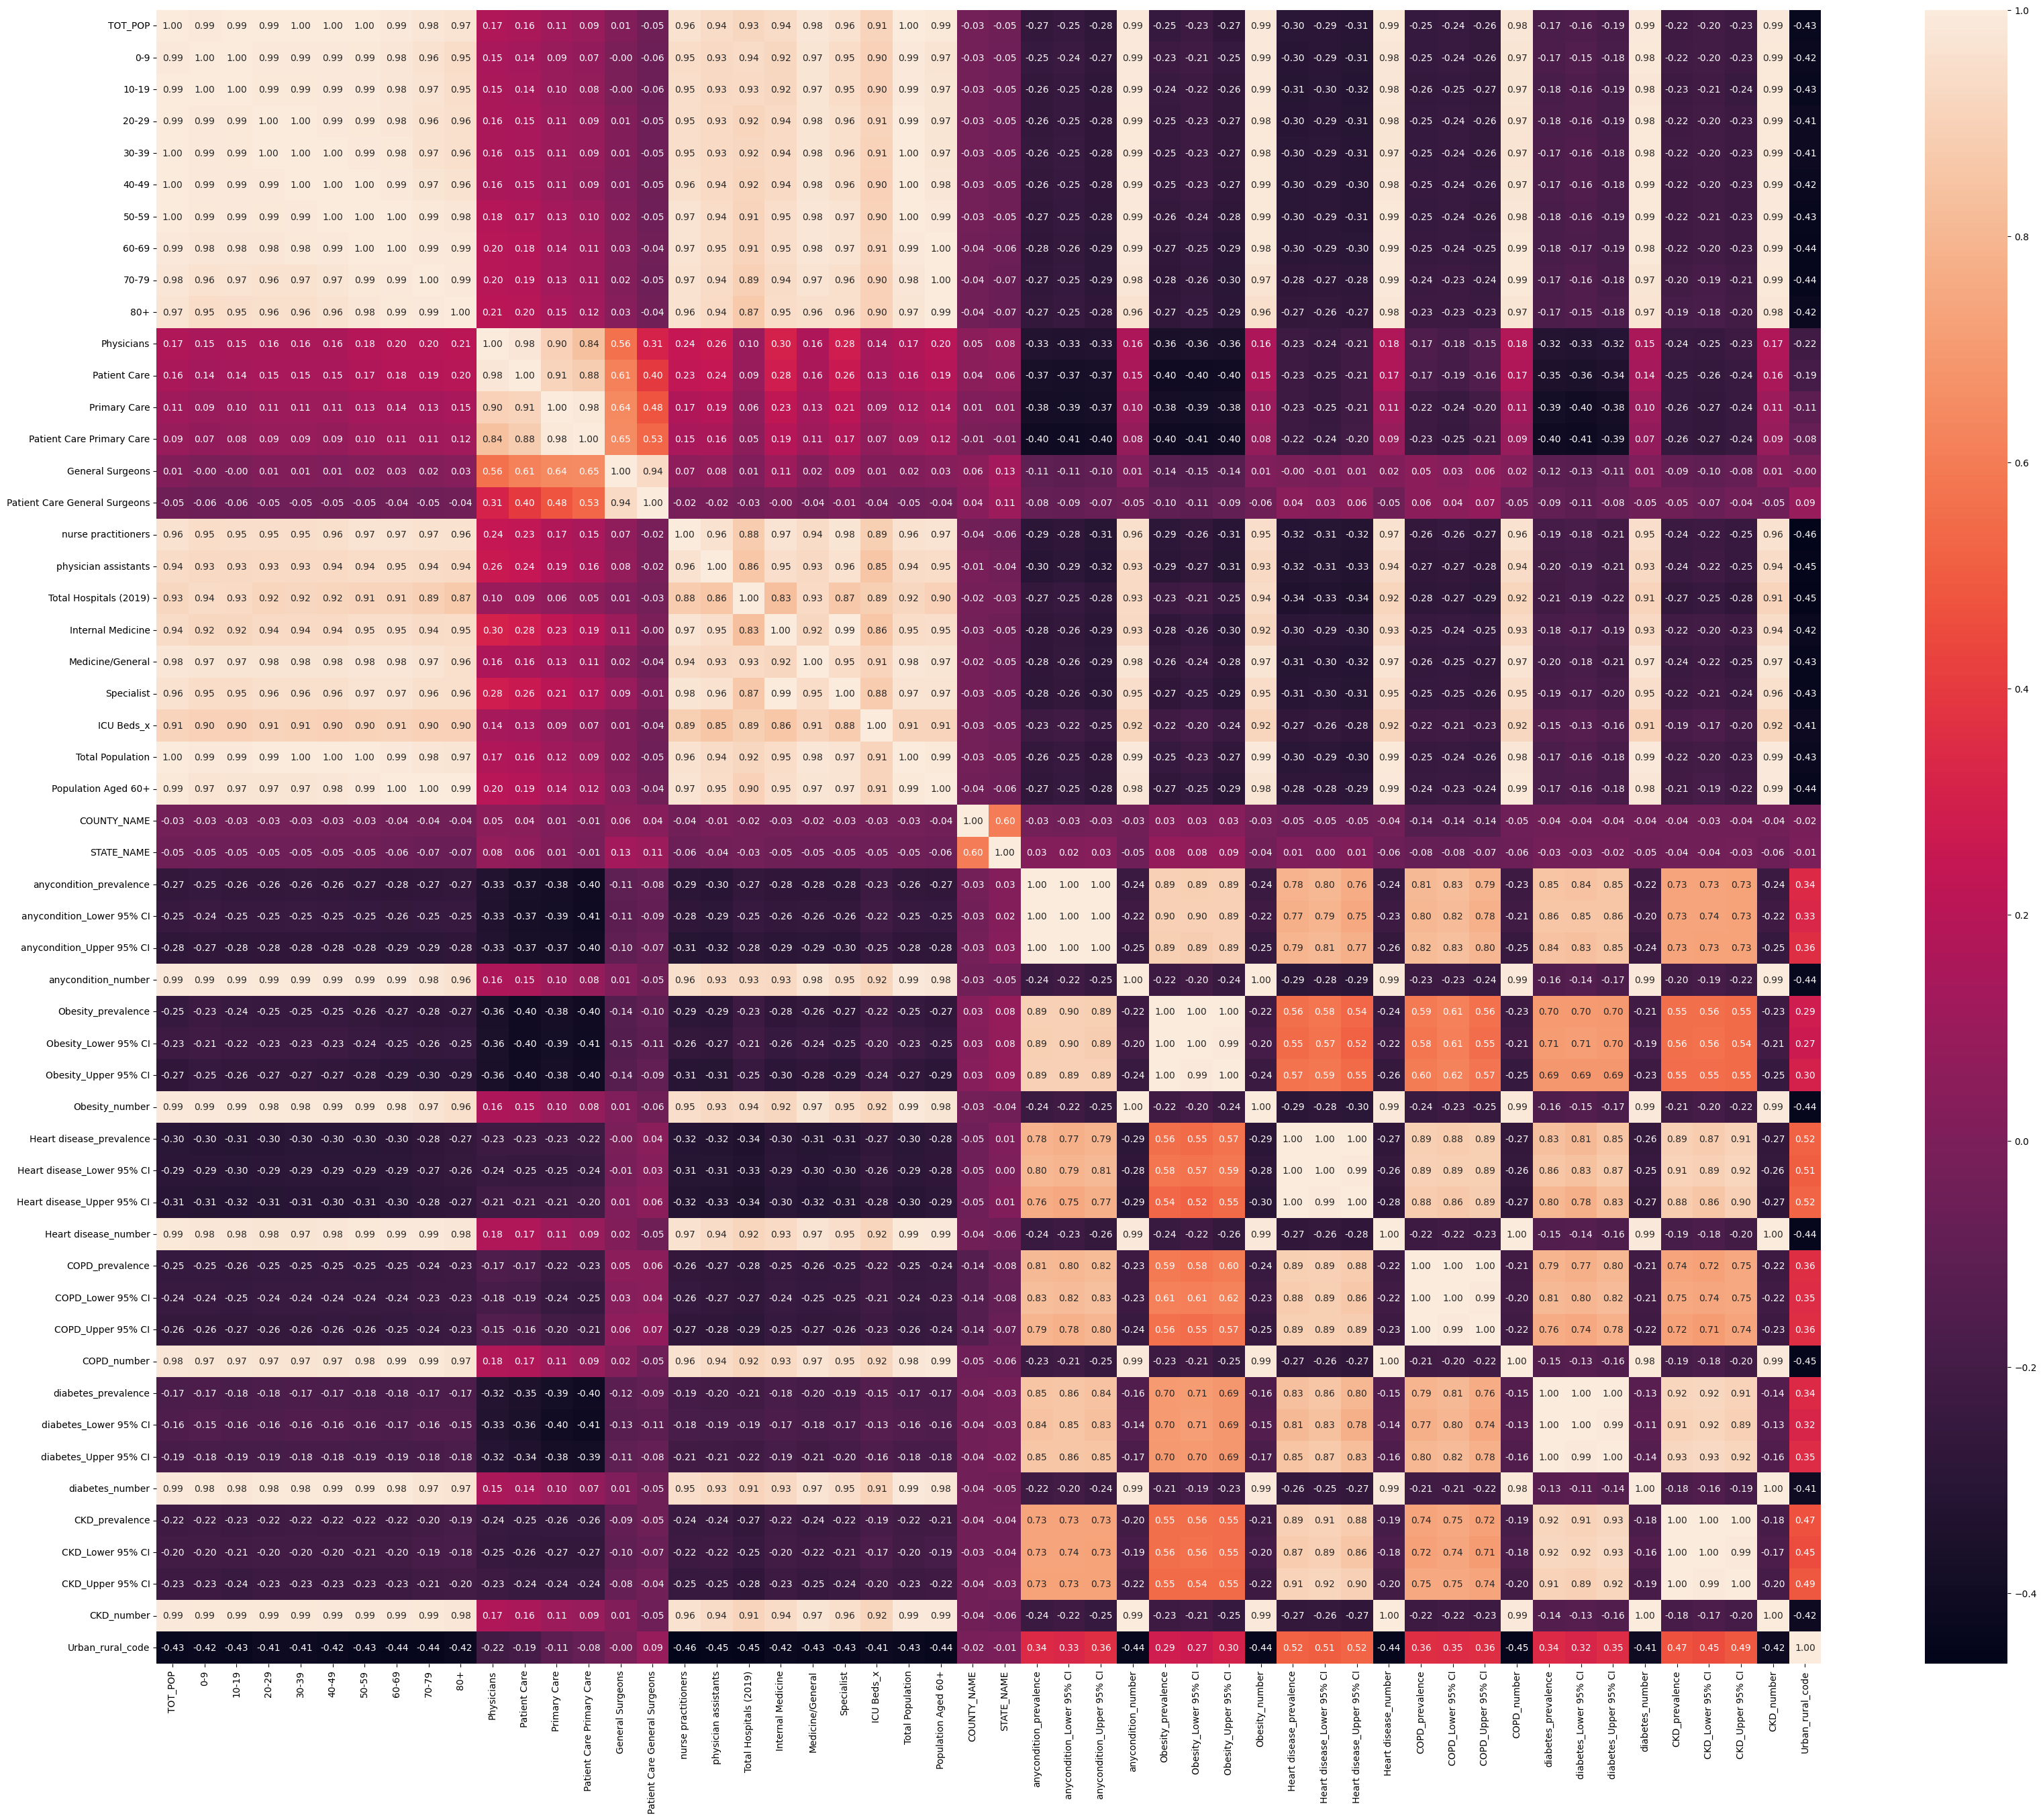

In [162]:
plt.figure(figsize=(40, 32))
sns.heatmap(df_f.corr(), annot=True, fmt=".2f")
plt.show()

There are strong correlations between the different variables.
### 5. Feature engineering
#### 5.1 Outliers

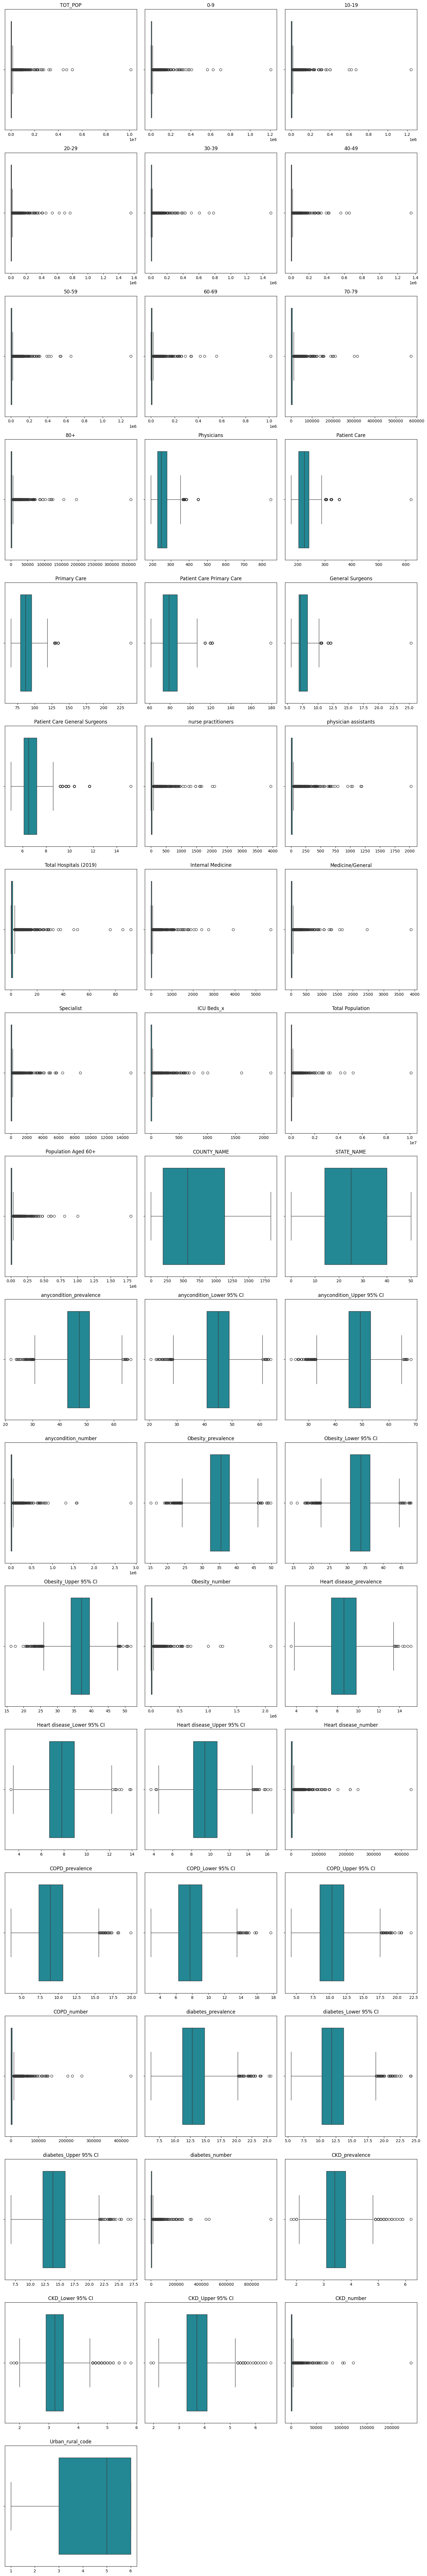

In [193]:
EDA.numerical_box(df_f.columns, df_f)

In [194]:
df_f.columns

Index(['TOT_POP', '0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69',
       '70-79', '80+', 'Physicians', 'Patient Care', 'Primary Care',
       'Patient Care Primary Care', 'General Surgeons',
       'Patient Care General Surgeons', 'nurse practitioners',
       'physician assistants', 'Total Hospitals (2019)', 'Internal Medicine',
       'Medicine/General', 'Specialist', 'ICU Beds_x', 'Total Population',
       'Population Aged 60+', 'COUNTY_NAME', 'STATE_NAME',
       'anycondition_prevalence', 'anycondition_Lower 95% CI',
       'anycondition_Upper 95% CI', 'anycondition_number',
       'Obesity_prevalence', 'Obesity_Lower 95% CI', 'Obesity_Upper 95% CI',
       'Obesity_number', 'Heart disease_prevalence',
       'Heart disease_Lower 95% CI', 'Heart disease_Upper 95% CI',
       'Heart disease_number', 'COPD_prevalence', 'COPD_Lower 95% CI',
       'COPD_Upper 95% CI', 'COPD_number', 'diabetes_prevalence',
       'diabetes_Lower 95% CI', 'diabetes_Upper 95% CI', 'diabete

Replace ages outliers by mode

In [195]:
from edastatmil_milser.edas_tatmil import Do_enum

In [196]:
clean_df = df_f.copy()

In [197]:
ages_col = ['TOT_POP','0-9','10-19','20-29','30-39','40-49','50-59','60-69','70-79','80+']

outliers_df_list=[]
for col in ages_col:
    print(col)
    outliers, clean_df = EDA.outliers_iqr(clean_df, col,1, Do=Do_enum.MODE)
    outliers_df_list.append(outliers)
age_outliers = pd.concat(outliers_df_list, ignore_index=True)

TOT_POP
124862.75 -45986.5
509 outliers have been treated by replacing them with the mode
0-9
14913.5 -5536.0
499 outliers have been treated by replacing them with the mode
10-19
16270.0 -6073.25
505 outliers have been treated by replacing them with the mode
20-29
16688.75 -6448.75
511 outliers have been treated by replacing them with the mode
30-39
15395.75 -5848.75
506 outliers have been treated by replacing them with the mode
40-49
14995.75 -5630.0
496 outliers have been treated by replacing them with the mode
50-59
16831.5 -6191.25
490 outliers have been treated by replacing them with the mode
60-69
15944.5 -5757.5
474 outliers have been treated by replacing them with the mode
70-79
10197.25 -3672.5
450 outliers have been treated by replacing them with the mode
80+
5266.5 -1833.75
466 outliers have been treated by replacing them with the mode


In [198]:
age_outliers.to_csv('../data/processed/NonSplit/AgeOutliers.csv')
age_outliers.shape

(4906, 52)

In [199]:
issuesnum_col = ['anycondition_number','Obesity_number','Heart disease_number','COPD_number','diabetes_number','CKD_number']

outliers_issuesnum_list=[]
for col in issuesnum_col:
    print(col)
    outliers_issuesnum, clean_df = EDA.outliers_iqr(clean_df, col,1, Do=Do_enum.MODE)
    outliers_issuesnum_list.append(outliers_issuesnum)
issuesnum_outliers = pd.concat(outliers_df_list, ignore_index=True)

anycondition_number
45787.5 -16571.25
469 outliers have been treated by replacing them with the mode
Obesity_number
34010.0 -12392.5
482 outliers have been treated by replacing them with the mode
Heart disease_number
7953.5 -2779.0
454 outliers have been treated by replacing them with the mode
COPD_number
8639.0 -3097.0
450 outliers have been treated by replacing them with the mode
diabetes_number
12170.75 -4303.75
467 outliers have been treated by replacing them with the mode
CKD_number
3237.75 -1146.75
467 outliers have been treated by replacing them with the mode


In [200]:
issuesnum_outliers.to_csv('../data/processed/NonSplit/IssuesNumOutliers.csv')
issuesnum_outliers.shape

(4906, 52)

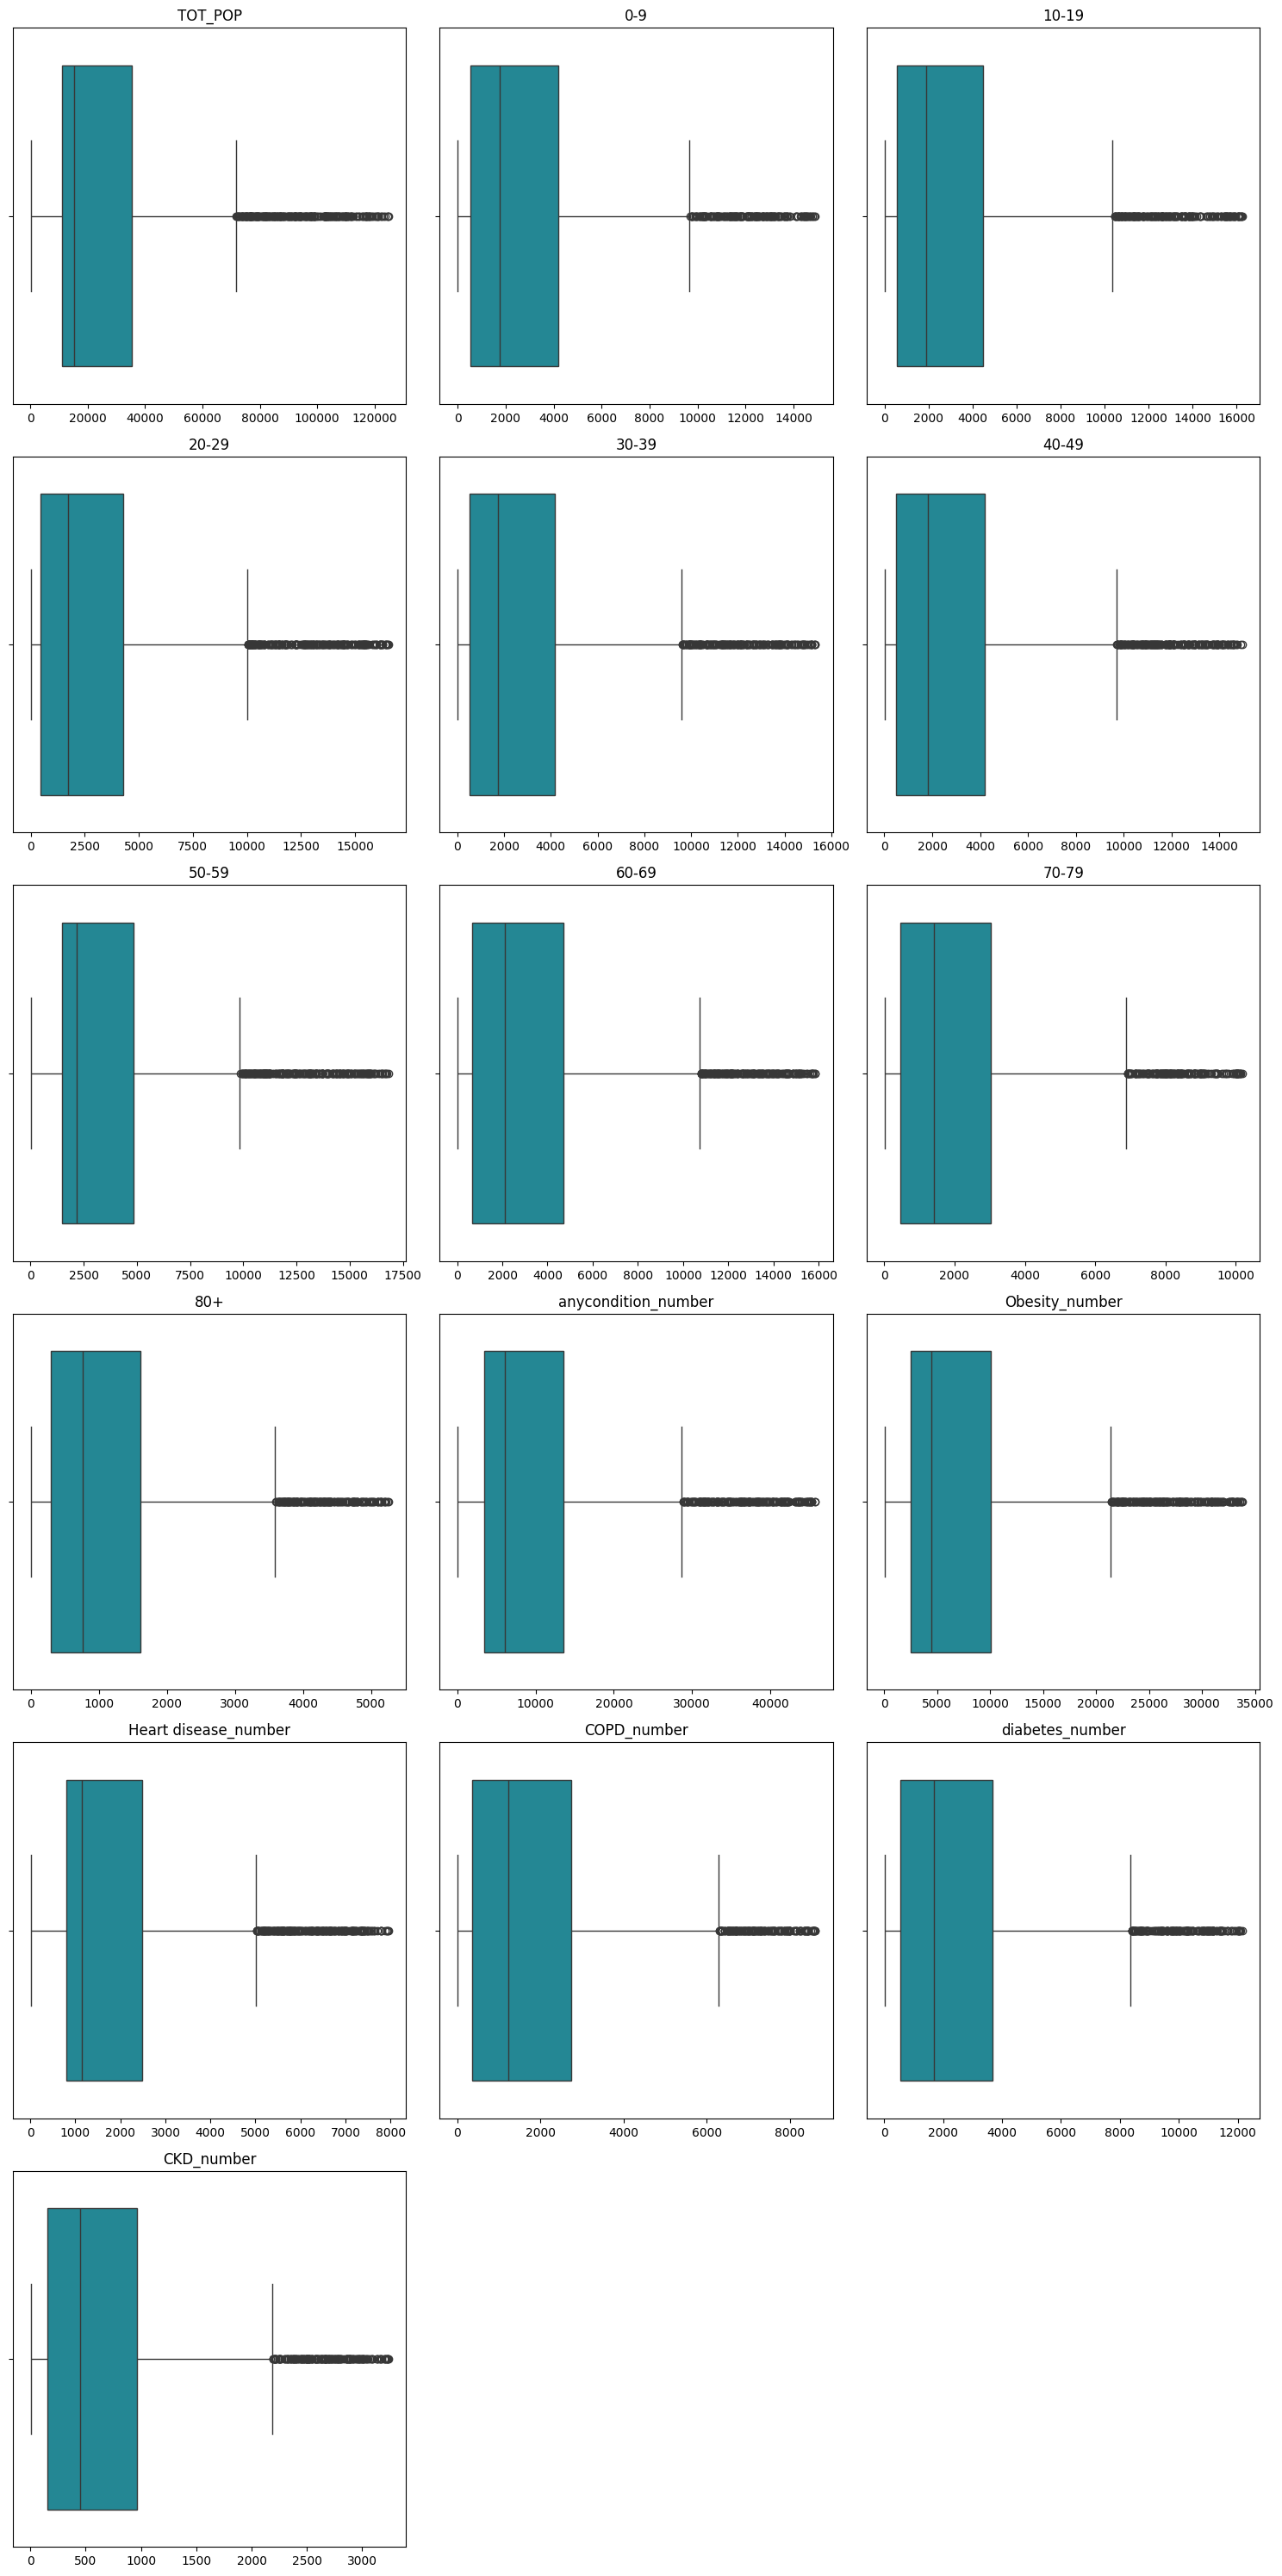

In [201]:
EDA.numerical_box(ages_col+issuesnum_col, clean_df)

Replace outliers by mean

In [202]:
issues_cols = ['anycondition_prevalence', 'anycondition_Lower 95% CI', 'anycondition_Upper 95% CI','Obesity_prevalence', 'Obesity_Lower 95% CI', 'Obesity_Upper 95% CI', 'Heart disease_prevalence','Heart disease_Lower 95% CI', 'Heart disease_Upper 95% CI', 'COPD_prevalence', 'COPD_Lower 95% CI','COPD_Upper 95% CI', 'diabetes_prevalence','diabetes_Lower 95% CI', 'diabetes_Upper 95% CI','CKD_prevalence', 'CKD_Lower 95% CI', 'CKD_Upper 95% CI']

outliers_issues_list=[]
for col in issues_cols:
    print(col)
    issues_outliers, clean_df = EDA.outliers_iqr(clean_df, col,1, Do=Do_enum.MEAN)
    outliers_issues_list.append(issues_outliers)
issues_outliers = pd.concat(outliers_issues_list, ignore_index=True)

anycondition_prevalence
59.1 34.8
194 outliers have been treated by replacing them with the mean
anycondition_Lower 95% CI
57.0 32.699999999999996
194 outliers have been treated by replacing them with the mean
anycondition_Upper 95% CI
61.2 36.9
195 outliers have been treated by replacing them with the mean
Obesity_prevalence
43.4 26.9
232 outliers have been treated by replacing them with the mean
Obesity_Lower 95% CI
41.8 25.300000000000004
233 outliers have been treated by replacing them with the mean
Obesity_Upper 95% CI
45.05 28.475
235 outliers have been treated by replacing them with the mean
Heart disease_prevalence
12.200000000000001 5.0
118 outliers have been treated by replacing them with the mean
Heart disease_Lower 95% CI
11.100000000000001 4.5
119 outliers have been treated by replacing them with the mean
Heart disease_Upper 95% CI
13.2 5.699999999999999
176 outliers have been treated by replacing them with the mean
COPD_prevalence
13.899999999999999 4.0
104 outliers have 

In [203]:
issues_outliers.to_csv('../data/processed/NonSplit/IssuesOutliers.csv')
clean_df.to_csv('../data/processed/CleanFact.csv')
issues_outliers.shape

(3155, 52)

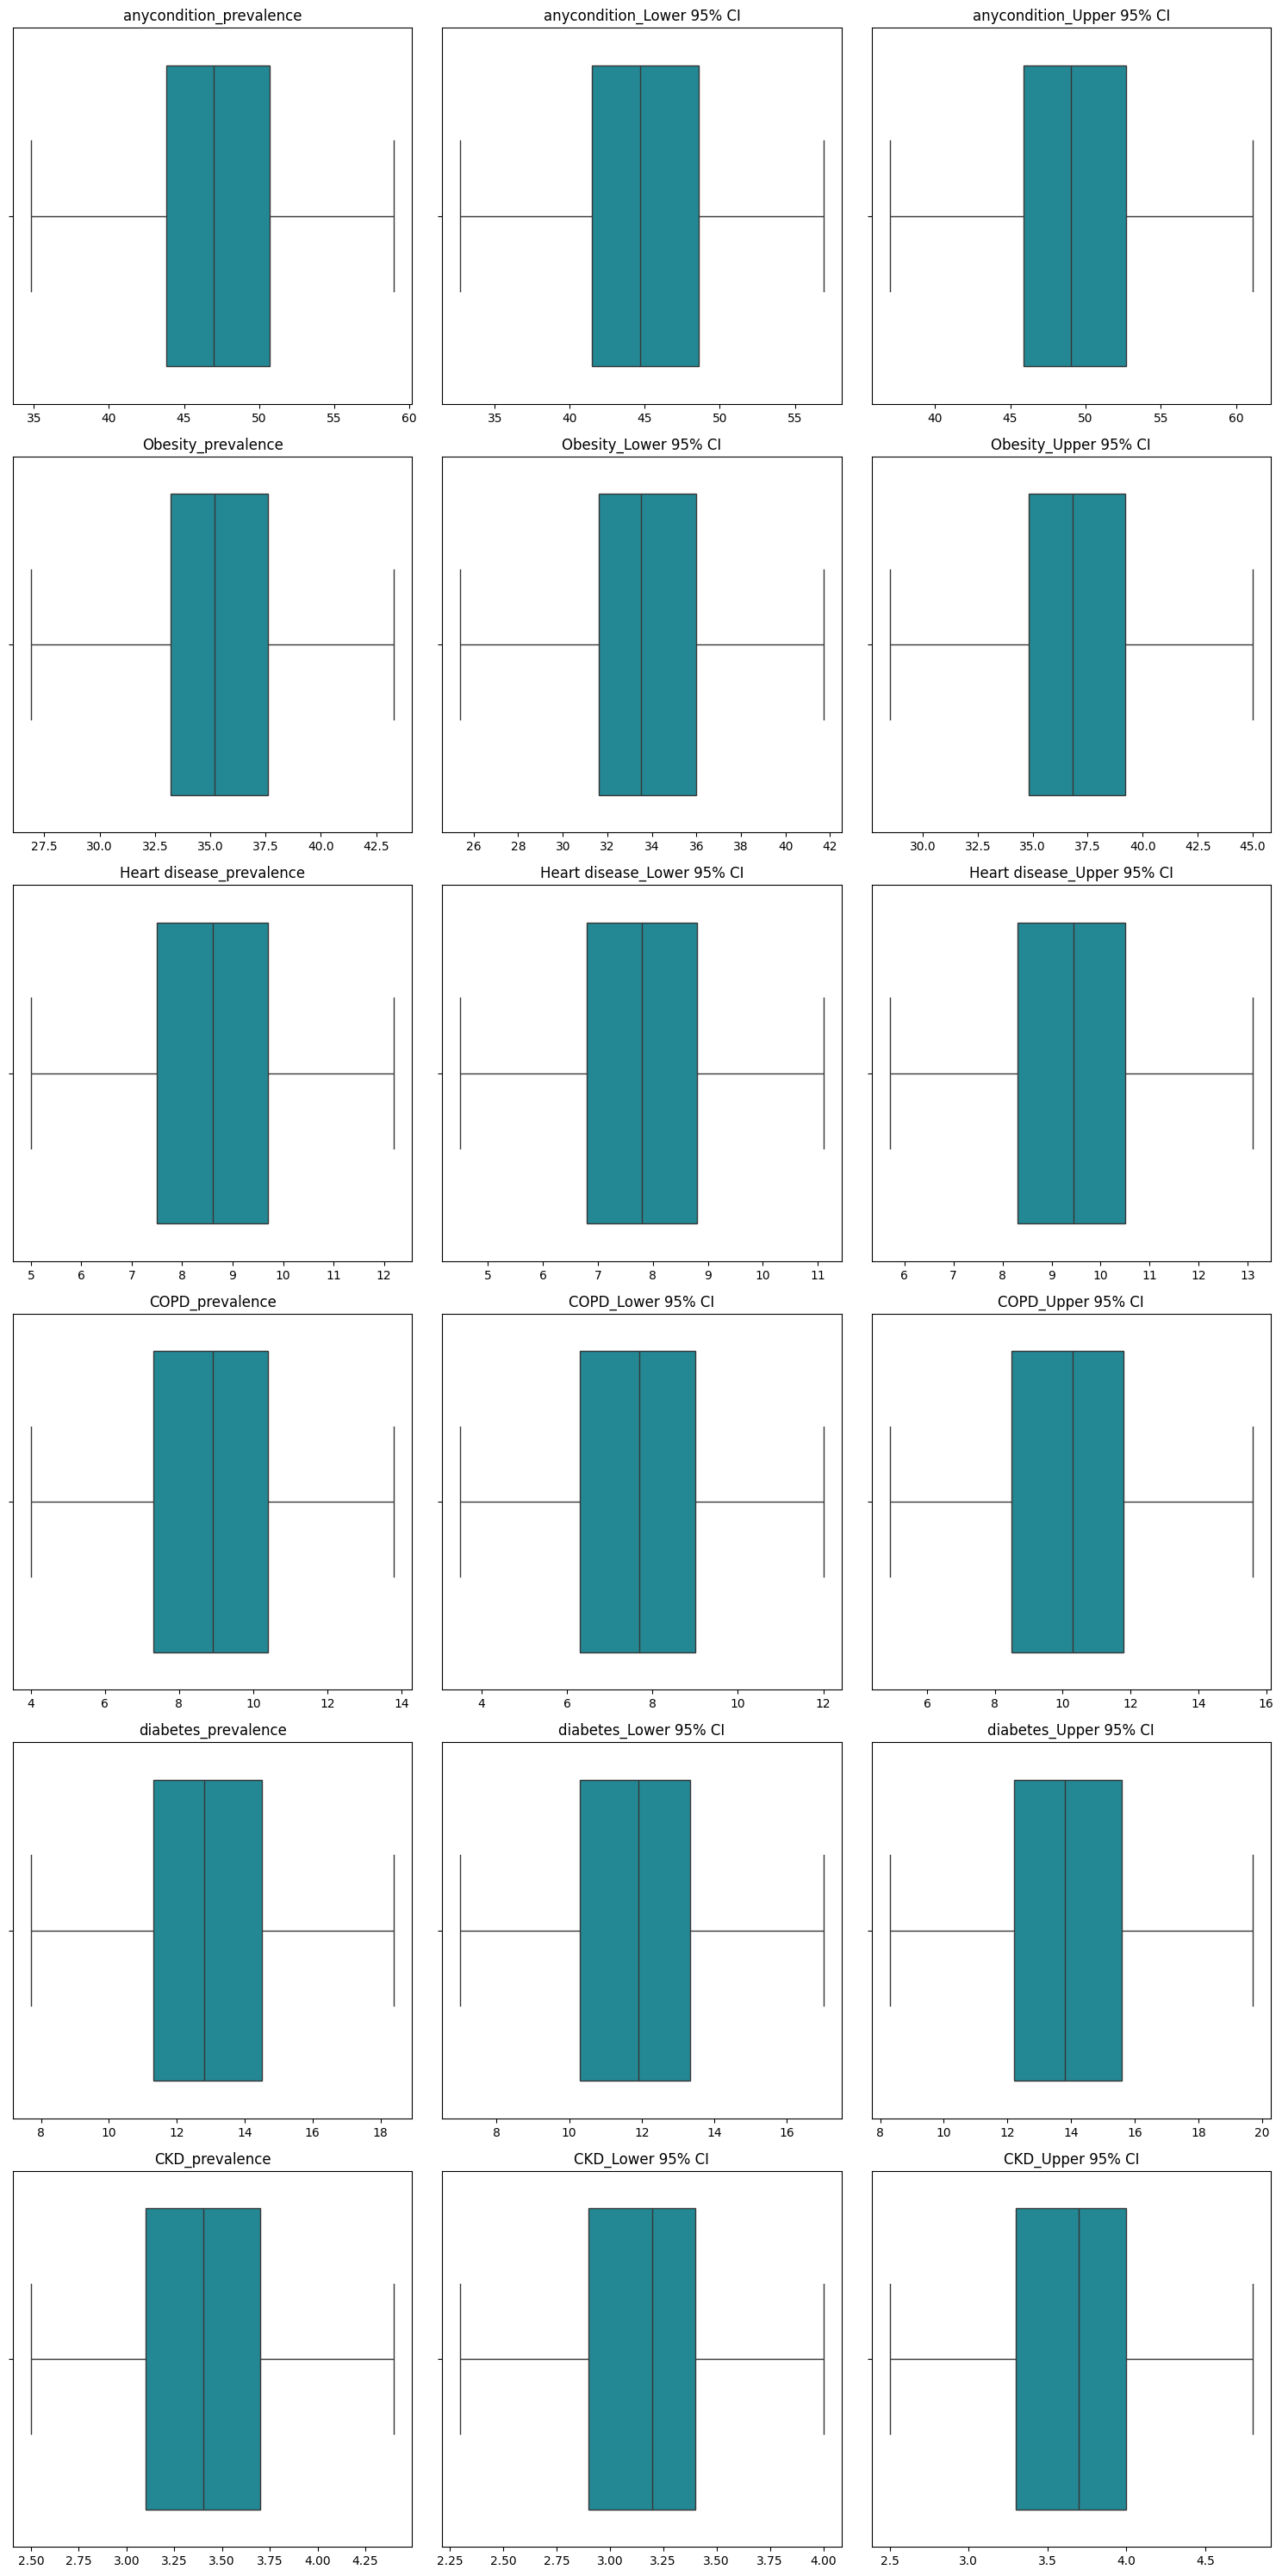

In [204]:
EDA.numerical_box(issues_cols, clean_df)

#### 5.3 Feature scaling

In [205]:
clean_df.columns

Index(['TOT_POP', '0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69',
       '70-79', '80+', 'Physicians', 'Patient Care', 'Primary Care',
       'Patient Care Primary Care', 'General Surgeons',
       'Patient Care General Surgeons', 'nurse practitioners',
       'physician assistants', 'Total Hospitals (2019)', 'Internal Medicine',
       'Medicine/General', 'Specialist', 'ICU Beds_x', 'Total Population',
       'Population Aged 60+', 'COUNTY_NAME', 'STATE_NAME',
       'anycondition_prevalence', 'anycondition_Lower 95% CI',
       'anycondition_Upper 95% CI', 'anycondition_number',
       'Obesity_prevalence', 'Obesity_Lower 95% CI', 'Obesity_Upper 95% CI',
       'Obesity_number', 'Heart disease_prevalence',
       'Heart disease_Lower 95% CI', 'Heart disease_Upper 95% CI',
       'Heart disease_number', 'COPD_prevalence', 'COPD_Lower 95% CI',
       'COPD_Upper 95% CI', 'COPD_number', 'diabetes_prevalence',
       'diabetes_Lower 95% CI', 'diabetes_Upper 95% CI', 'diabete

In [206]:
predictors = ['TOT_POP', '0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69',
       '70-79', '80+', 'Physicians', 'Patient Care', 'Primary Care',
       'Patient Care Primary Care', 'General Surgeons',
       'Patient Care General Surgeons', 'nurse practitioners',
       'physician assistants', 'Total Hospitals (2019)', 'Internal Medicine',
       'Medicine/General', 'Specialist', 'ICU Beds_x', 'Total Population',
       'Population Aged 60+', 'COUNTY_NAME', 'STATE_NAME',
       'anycondition_prevalence', 'anycondition_Lower 95% CI',
       'anycondition_Upper 95% CI', 'Obesity_prevalence', 'Obesity_Lower 95% CI', 'Obesity_Upper 95% CI',
       'Obesity_number', 'Heart disease_prevalence',
       'Heart disease_Lower 95% CI', 'Heart disease_Upper 95% CI',
       'Heart disease_number', 'COPD_prevalence', 'COPD_Lower 95% CI',
       'COPD_Upper 95% CI', 'COPD_number', 'diabetes_prevalence',
       'diabetes_Lower 95% CI', 'diabetes_Upper 95% CI', 'diabetes_number',
       'CKD_prevalence', 'CKD_Lower 95% CI', 'CKD_Upper 95% CI', 'CKD_number',
       'Urban_rural_code']
target = 'anycondition_number'
EDA.splitter('../data/processed/', predictors, target)


{'AllPrecleanedFact_Xtrain':       TOT_POP    0-9  10-19  20-29  30-39  40-49  50-59  60-69  70-79   80+  \
 480     13143   1345   1440   1973   1768   1544   1859   1748   1050   416   
 803     42647   4791   5040   4855   4775   4515   6065   6229   3644  2733   
 2245   164742  17220  18032  18501  19360  18498  24629  24157  14580  9765   
 1080    45851   5890   5903   5717   5747   5729   6604   5693   3121  1447   
 2940    94632  13198  10807  14945  14143   9978  11740  10398   5934  3489   
 ...       ...    ...    ...    ...    ...    ...    ...    ...    ...   ...   
 3092    42555   4478   6520   6989   4822   4879   5836   5062   2641  1328   
 1095    56031   7624   7993   7669   7740   7959   7241   5615   2919  1271   
 1130    33443   4680   4568   4778   4199   3763   4355   3608   2322  1170   
 1294     5795    331    493    335    379    540    986   1312    938   481   
 860      8929   1092   1181   1044    969    907   1133   1193    734   676   
 
       ...

In [207]:
EDA.normalize('../data/processed/SplitData/',predictors,scaler='StandardScaler')

{'AllPrecleanedFact_Xtest_norm':       TOT_POP       0-9     10-19     20-29     30-39     40-49     50-59  \
 0   -0.362635 -0.360632 -0.376440 -0.340585 -0.325913 -0.345452 -0.370149   
 1    0.680379  0.606576  0.551077  0.743118  0.625535  0.558620  0.684700   
 2   -0.329157 -0.319922 -0.337289 -0.310056 -0.294060 -0.307320 -0.336612   
 3    0.070498  0.102086  0.102216 -0.006621  0.023817  0.064292  0.116324   
 4    0.503908  0.402159  0.458533  0.717422  0.414890  0.417311  0.415153   
 ..        ...       ...       ...       ...       ...       ...       ...   
 937  0.775382  0.546060  0.655852  0.648390  0.700586  0.775247  0.922461   
 938  0.238530  0.153102  0.228067  0.122152  0.107813  0.237966  0.382836   
 939 -0.245410 -0.233221 -0.242158 -0.240943 -0.242953 -0.242433 -0.240350   
 940  0.426088  0.257034  0.330670  0.258659  0.309895  0.392037  0.593975   
 941 -0.339921 -0.323239 -0.339109 -0.326112 -0.311350 -0.332500 -0.350378   
 
         60-69     70-79      

In [208]:
Xtrain_All = pd.read_csv('../data/processed/SplitData/NormData/AllPrecleanedFact_Xtrain_norm.csv')
ytrain_All = pd.read_csv('../data/processed/SplitData/AllPrecleanedFact_ytrain.csv')
Xtrain_Clean = pd.read_csv('../data/processed/SplitData/NormData/CleanFact_Xtrain_norm.csv')
ytrain_Clean = pd.read_csv('../data/processed/SplitData/CleanFact_ytrain.csv')

In [212]:
EDA.feature_sel(Xtrain_All,ytrain_All,k=50,file_name='All_Xtrain', method='SelectKBest', test='mutual_info_regression')
EDA.feature_sel(Xtrain_Clean,ytrain_Clean,k=50,file_name='Clean_Xtrain', method='SelectKBest', test='mutual_info_regression')


/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,TOT_POP,0-9,10-19,20-29,30-39,40-49,50-59,60-69,70-79,80+,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,-0.548019,-0.515129,-0.504108,-0.334100,-0.383471,-0.454212,-0.514228,-0.475793,-0.510056,-0.676425,...,-0.359673,0.094047,0.115167,0.084722,-0.230849,2.307722,0.140874,2.037638,-0.336737,0.897029
1,0.612288,0.558201,0.519774,0.480582,0.551572,0.468127,0.687805,0.836395,0.656950,1.387126,...,0.286665,-0.911595,-0.955009,-0.866088,0.366116,-0.497257,-0.394757,-0.323408,0.549087,0.234728
2,-0.493748,-0.830961,-0.859622,-0.786103,-0.767813,-0.812778,-0.578245,-0.844763,-0.871765,-0.783298,...,-0.939759,-0.601963,-0.627608,-0.612958,-0.804433,-0.497257,-0.394757,-0.323408,-0.797537,-1.752175
3,0.738292,0.900507,0.765221,0.724251,0.853821,0.845009,0.841846,0.679436,0.421659,0.241797,...,0.889004,-0.026932,0.027194,-0.022321,0.679871,-0.964754,-0.910988,-0.913670,0.493275,0.234728
4,2.656708,3.176739,2.159975,3.332813,3.464604,2.164099,2.309663,2.057219,1.687191,2.060430,...,1.894924,0.503865,0.635225,0.399563,2.831660,-0.029761,0.379590,-0.126654,2.553996,-1.752175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2193,0.608670,0.460710,0.940703,1.083819,0.566187,0.581129,0.622359,0.494658,0.205714,0.135814,...,0.006484,-2.150123,-2.124300,-2.173928,0.007107,-2.133495,-2.201567,-1.897439,0.184167,-1.752175
2194,1.138642,1.440598,1.359641,1.276040,1.473555,1.537306,1.023894,0.656595,0.330782,0.085050,...,0.874843,-0.778896,-0.767923,-0.781711,0.750391,-1.899747,-1.943451,-1.700685,0.550518,-1.089874
2195,0.250321,0.523627,0.385532,0.458815,0.372462,0.234670,0.199104,0.068878,0.062200,-0.004902,...,0.611857,1.388528,1.477114,1.285519,0.497350,1.372729,1.670168,1.250623,0.434602,0.897029
2196,-0.836995,-0.830961,-0.773445,-0.797128,-0.815389,-0.765900,-0.763723,-0.603468,-0.560443,-0.618535,...,-0.627210,1.432762,1.290028,1.623027,-0.702991,0.078329,0.140874,0.090715,-0.687346,0.897029


### 6. Regularized Lineal Model
As we have a lot of variables and maybe the feature selection has not been as strong as it must be, we choose the Lasso model

In [225]:
Xtrain_All_ = pd.read_csv('../data/processed/SplitData/FeatureSel/All_Xtrain_FeatureSel.csv')
ytrain_All_ = pd.read_csv('../data/processed/SplitData/AllPrecleanedFact_ytrain.csv')
Xtest_All_ = pd.read_csv('../data/processed/SplitData/NormData/AllPrecleanedFact_Xtest_norm.csv')
All_Xtest_sel = Xtest_All_ [Xtrain_All_.columns]
ytest_All_ = pd.read_csv('../data/processed/SplitData/AllPrecleanedFact_ytest.csv')

Xtrain_Clean_ = pd.read_csv('../data/processed/SplitData/FeatureSel/Clean_Xtrain_FeatureSel.csv')
ytrain_Clean_ = pd.read_csv('../data/processed/SplitData/CleanFact_ytrain.csv')
Xtest_Clean_ = pd.read_csv('../data/processed/SplitData/NormData/CleanFact_Xtest_norm.csv')
Xtest_Clean_sel = Xtest_Clean_[Xtrain_Clean_.columns]
ytest_Clean_ = pd.read_csv('../data/processed/SplitData/CleanFact_ytest.csv')

In [227]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

All_lasso_model = Lasso(alpha = 0.1, max_iter = 300)
All_lasso_model.fit(Xtrain_All_, ytrain_All_)
All_y_pred = All_lasso_model.predict(All_Xtest_sel)

mse = mean_squared_error(ytest_All_, All_y_pred)
print("MSE:", mse)
r2 = r2_score(ytest_All_, All_y_pred)
print("R-2:", r2)

MSE: 1064841907.823074
R-2: 0.8091649150187044


/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.815e+09, tolerance: 2.544e+09
  model = cd_fast.enet_coordinate_descent(


In [229]:
Clean_lasso_model = Lasso(alpha = 0.1, max_iter = 300)
Clean_lasso_model.fit(Xtrain_Clean_, ytrain_Clean_)
Clean_y_pred = Clean_lasso_model.predict(Xtest_Clean_sel)

mse = mean_squared_error(ytest_Clean_, Clean_y_pred)
print("MSE:", mse)
r2 = r2_score(ytest_Clean_, Clean_y_pred)
print("R-2:", r2)

MSE: 13386660.142894095
R-2: 0.8667904675978775


/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.451e+09, tolerance: 2.107e+07
  model = cd_fast.enet_coordinate_descent(


### 6.1 Optimize

In [232]:
import numpy as np 
from sklearn.model_selection import GridSearchCV

lasso = Lasso(random_state=0, max_iter=10000)
alphas = np.logspace(-4, -0.5, 30)

tuned_parameters = [{"alpha": alphas}]
n_folds = 5

clf = GridSearchCV(lasso, tuned_parameters, cv=n_folds, refit=False)
clf.fit(Xtrain_All_, ytrain_All_)
scores = clf.cv_results_["mean_test_score"]
print(scores)

/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.842e+09, tolerance: 2.238e+09
  model = cd_fast.enet_coordinate_descent(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.084e+09, tolerance: 2.260e+09
  model = cd_fast.enet_coordinate_descent(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2

[0.99848511 0.99848511 0.99848511 0.99848512 0.99848513 0.99848514
 0.99848515 0.99848517 0.99848519 0.99848522 0.99848525 0.9984853
 0.99848537 0.99848546 0.99848558 0.99848573 0.99848593 0.9984862
 0.99848656 0.99848702 0.99848764 0.99848846 0.99848954 0.99849097
 0.99849281 0.99850724 0.99851531 0.99852665 0.99853969 0.99855318]


/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.348e+09, tolerance: 1.370e+09
  model = cd_fast.enet_coordinate_descent(
